In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#importing PostgreSQLconnection class from my PostgreSQL_Database_wrapper file and creating an instance of it
from PostgreSQL import connectionPostgreSQL
db=connectionPostgreSQL("DRecommenderSystem_db","postgres","YASH","localhost")

Successfully connected to database.


In [38]:
query=  '''      
        SELECT Rating.userId,Rating.Movie_id,Rating.Movie_Title,Rating.Rating
        FROM Rating
        LEFT JOIN Movies
        ON Rating.Movie_id = Movies.Movie_id;
        '''
data=db.run_query(query)
data.head()

E:\SOFTWARES\IMPORTANT\PYTHON\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,userid,movie_id,movie_title,rating
0,1,1,Gadhvi (He thought he was Gandhi),7
1,3,3,Yaaram,4.4000000000000004
2,5,5,Aur Pyaar Ho Gaya,4.7000000000000002
3,6,6,Yahaan,7.4000000000000004
4,8,8,A Question Mark,5.5999999999999996


In [39]:
MatrixData=data.drop(['movie_title'],axis=1)


In [40]:

MovieUserMatrix = MatrixData.pivot_table(index='movie_id',columns='userid',values='rating')
MovieUserMatrix.head()

userid,1,3,5,6,8,9,10,11,12,13,...,15482,15487,15488,15490,15492,15493,15494,15503,15505,15508
movie_id,,,,,,,,,,,,,,,,,,,,,
1,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,7.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,5.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
MovieUserMatrix_Y=MovieUserMatrix.fillna(-1)
MovieUserMatrix_Y

userid,1,3,5,6,8,9,10,11,12,13,...,15482,15487,15488,15490,15492,15493,15494,15503,15505,15508
movie_id,,,,,,,,,,,,,,,,,,,,,
1,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,4.4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,4.7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,-1.0,-1.0,-1.0,7.4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0,-1.0,5.6,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,6.1,-1.0,-1.0,-1.0,-1.0
15494,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.2,-1.0,-1.0,-1.0
15503,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.8,-1.0,-1.0


In [42]:
MovieUserMatrix_R=MovieUserMatrix.copy()
MovieUserMatrix_R=MovieUserMatrix_R.where(~MovieUserMatrix_R.notna(), 1)
MovieUserMatrix_R=MovieUserMatrix_R.fillna(0)
MovieUserMatrix_R

userid,1,3,5,6,8,9,10,11,12,13,...,15482,15487,15488,15490,15492,15493,15494,15503,15505,15508
movie_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
#sanity check
MovieUserMatrix_Y.shape==MovieUserMatrix_R.shape

True

In [44]:
#getting values out of pandas dataframe into numpy-array because my alogorithm accept numpy-array as parameter
Y=MovieUserMatrix_Y.values
R=MovieUserMatrix_R.values

# Hybrid recommendation approach 

In [45]:
#Implementation of Collaborative filtering Cost function and gradient, regularized and non regularized
def  cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda):
    """
            calculates Collaborative filtering Cost function and gradient both regularized and non regularized
            
            Parameters
            ----------
            params: numpy array-like
                    initial values for users parameter vectors and movies feature vectors
            
            Y: numpy array-like
                    user-item interaction matrix
            R: numpy arra-like
                    Its a binary-valued indicator matrix for user-item interaction matrix
            num_users: int-like
                    total number of users
            num_movies: int-like
                    total number of movies
            Lambda: Float-like
                    Regularization parameter
                    
            Returns
            -------
            J:Float-like
                    Cost
            grad:Float-like
                    Gradient
            reg_J:Float-like
                    Regularized Cost
            reg_grad:Float-like
                    Regularized gradient
    """
    # Unfold the params
    X = params[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = params[num_movies*num_features:].reshape(num_users,num_features)
    
    predictions =  np.dot(X,Theta.T)
    err = (predictions - Y)
    J = 1/2 * np.sum((err**2) * R)# multiplying by R will consider only those values for which value of (i,j)=r(i,j)=1
    
    #compute regularized cost function
    reg_X =  Lambda/2 * np.sum(Theta**2)
    reg_Theta = Lambda/2 *np.sum(X**2)
    reg_J = J + reg_X + reg_Theta
    
    # Compute gradient
    X_grad = np.dot(err*R,Theta)
    Theta_grad = np.dot((err*R).T,X)
    grad = np.append(X_grad.flatten(),Theta_grad.flatten()) #flattening calculated gradients of 4*3 dim into 12 real number one dim of vector for optimization algo since optimization algorithms deals with vectos not matrix 
    
    # Compute regularized gradient
    reg_X_grad = X_grad + Lambda*X
    reg_Theta_grad = Theta_grad + Lambda*Theta
    reg_grad = np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    #, reg_J, reg_grad
    
    return J, grad, reg_J, reg_grad

In [46]:
#Gradient descent implementation
def gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,alpha,num_iters,Lambda):
    """
            Optimize X and Theta
            
            Parameters
            ----------
            initial_parameters: numpy array-like
                    initial values for users parameter vectors and movies feature vectors
            
            Y: numpy array-like
                    user-item interaction matrix
            R: numpy arra-like
                    Its a binary-valued indicator matrix for user-item interaction matrix
            num_users: int-like
                    total number of users
            num_movies: int-like
                    total number of movies
            alpha: Float-lik
                    learning rate
            num_iters: integer-like
                    number of iterations of optimization algorithm
            Lambda: Float-like
                    Regularization parameter
                    
            Returns
            -------
            paramsFinal: numpy-array-like
                    Learned user parameters and feature vectors for movies
            J_history: numpy-array-like
                     History of decrease in cost as gradeint descent moves towords global minima
    """
    # unfold the parameters
    X = initial_parameters[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = initial_parameters[num_movies*num_features:].reshape(num_users,num_features)
    
    J_history =[]
    
    for i in range(num_iters):
        params = np.append(X.flatten(),Theta.flatten())
        cost, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda)[2:]
        
        # unfold grad
        X_grad = grad[:num_movies*num_features].reshape(num_movies,num_features)
        Theta_grad = grad[num_movies*num_features:].reshape(num_users,num_features)
        X = X - (alpha * X_grad)
        Theta = Theta - (alpha * Theta_grad)
        J_history.append(cost)
    
    paramsFinal = np.append(X.flatten(),Theta.flatten())
    return paramsFinal , J_history

In [47]:
def normalizeRatings(Y, R):
    """
    normalized Y so that each movie has a rating of 0 on average, and returns the mean rating in Ymean.
    
    Parameters
    ----------
    Y: numpy array-like
                    user-item interaction matrix
    R: numpy arra-like
                    Its a binary-valued indicator matrix for user-item interaction matrix
    Ynorm:numpy array-like
                    Normalize Y
    Ymean:numpy array-like
                    Mean of all movies
    """
    
    m,n = Y.shape[0], Y.shape[1]
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))
    
    for i in range(m):
        Ymean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
        Ynorm[i,R[i,:]==1] = Y[i,R[i,:]==1] - Ymean[i]
    return Ynorm, Ymean

In [48]:
def computeCost(X, y, theta):
    """
            calculates cost for given value of θ 
            
            Parameters
            ----------
            X: numpy-array-like
               matrix of features for all movies
               
            y: numpy-array-like
               binary vector of web-application user movie ratings (y ∈ R^9742) where 9742 is the number of movies rated by web-app user
                    
            theta:numpy-array-like
               value of θ for web application user
               
            Returns
            -------
            j: float-like
               cost
    """
    m=y.size
    s=np.dot(X,theta)-y
    j=(1/(2*m))*(np.dot(np.transpose(s),s))
    return j


In [49]:
def CBgradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        matrix of features for all movies
    
    y : array_like
        binary vector of ∈ R^9742 movies where 9742 is the number of movies
    
    theta : array_like
        Initial values for the web-applicaiton user parameters. 
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned parameters. 
    """
    m = float(y.shape[0])
    theta = theta.copy()
    for i in range(num_iters):
        theta=(theta)-(alpha/m)*(np.dot(np.transpose((np.dot(X,theta)-y)),X))
    return theta

In [50]:
def prediction(X,my_ratings,moviesdataset):
    """
    Performs prediction.
    
    Parameters
    ----------
    X : array_like
        matrix of features for all movies
    
    my_ratings : numpy-array-like
        Binary vector of web-application user movie ratings (y ∈ R^9742) where 9742 is the number of movies rated by web-app user
                    
    moviesdataset : pandas dataframe-like
        Dataframe contains movieid and title for all 9742 movies
    
    Returns
    -------
    sorted_data : array_like
        top-N recommendation
    
    """
    out_arr = my_ratings[np.nonzero(my_ratings)]
    out_arr=out_arr.reshape(-1,1)
    idx = np.where(my_ratings)[0]
    X_1=[X[x] for x in idx]
    X_1=np.array(X_1)
    y=out_arr
    y=np.reshape(y, -1)
    theta =CBgradientDescent(X_1,y,np.zeros((100)),0.001,4000)
    #mean=np.reshape(Ymean, -1)
    p = X @ theta.T
    #p=p+mean
    p=np.reshape(p, -1)
    predictedData=moviesdataset.copy()
    predictedData['Pridiction']=p
    sorted_data=predictedData.sort_values(by=['Pridiction'],ascending=False)
    return sorted_data[:10]


In [51]:
def train_test_split(Yratings,Rratings):
    """
    train and test split
    Parameters
    ----------
    Yratings: numpy array-like
                    user-item interaction matrix
    Rratings: numpy arra-like
                    Its a binary-valued indicator matrix for user-item interaction matrix
                    
    Returns
    -------
    Ytrain: numpy array-like
                   train user-item interaction matrix
    Ytest:  numpy array-like
                   test user-item interaction matrix
    Rtrain: numpy array-like
                   train its a binary-valued indicator matrix for user-item interaction matrix
    Rtest:  numpy array-like
                   test its a binary-valued indicator matrix for user-item interaction matrix
    
    """
    Ytest = np.zeros(Yratings.shape)
    Ytrain = Yratings.copy()
    Rtest = np.zeros(Rratings.shape)
    Rtrain = Rratings.copy()
    
    for user in range(Yratings.shape[0]):
        try:
            test_ratings = np.random.choice(Yratings[user, :].nonzero()[0], 
                                            size=10, 
                                            replace=False)
            Ytrain[user, test_ratings] = 0.
            Ytest[user, test_ratings] = Yratings[user, test_ratings]
            
            Rtrain[user, test_ratings] = 0.
            Rtest[user, test_ratings] = Rratings[user, test_ratings]
        except ValueError:
            test_ratings = np.random.choice(Yratings[user, :].nonzero()[0], 
                                            size=10, 
                                            replace=True)
            Ytrain[user, test_ratings] = 0.
            Ytest[user, test_ratings] = Yratings[user, test_ratings]
            
            Rtrain[user, test_ratings] = 0.
            Rtest[user, test_ratings] = Rratings[user, test_ratings]
    # Test and training are truly disjoint
    assert(np.all((Ytrain * Ytest) == 0))
    assert(np.all((Rtrain * Rtest) == 0))
    return Ytrain, Ytest, Rtrain, Rtest

In [52]:

Ytrain, Ytest, Rtrain, Rtest = train_test_split(Y,R)
num_users = Ytrain.shape[1]
num_movies = Ytrain.shape[0]
num_features = 100



In [53]:

X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.append(X.flatten(),Theta.flatten())
Lambda = 10


In [56]:

paramsFinal,J_history = gradientDescent(initial_parameters,Ytrain,Rtrain,num_users,num_movies,num_features,0.001,50,Lambda)


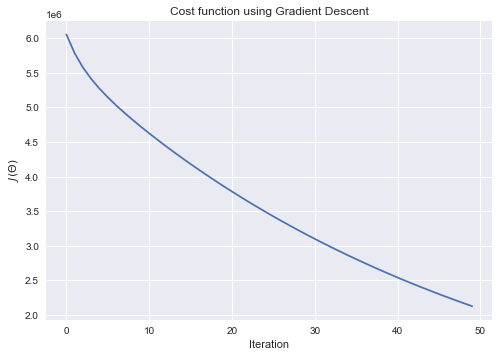

In [57]:

plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)

In [58]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):

    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [69]:
def learningCurve(Ytrain,Rtrain,Ytest,Rtest):
    """
    compute data for learning Curve
                    
    Parameters
    -------
    Ytrain: numpy array-like
                   train user-item interaction matrix
    Ytest:  numpy array-like
                   test user-item interaction matrix
    Rtrain: numpy array-like
                   train its a binary-valued indicator matrix for user-item interaction matrix
    Rtest:  numpy array-like
                   test its a binary-valued indicator matrix for user-item interaction matrix
                   
    Returns
    -------
    
    train_size_hist: numpy array-like
                   different training set sizes used
    train_score_hist: numpy array-like
                   scores relative to training size
    test_size_hist: numpy array-like
                   different test set sizes used
    test_score_hist: numpy array-like
                   scores relative to training size
    
    """
    Y=Ytrain
    R=Rtrain
    test_Y=Ytest
    test_R=Rtest
    train_size_hist=[]
    train_score_hist=[]
    test_size_hist=[]
    test_score_hist=[]
    size_list=[1,10,20,50,100]
    for size in size_list:
        Ytrain=Y[:size]
        Rtrain=R[:size]
        Ytest=test_Y[:size]
        Rtest=test_R[:size]
        num_users = Ytrain.shape[1]
        num_movies = Ytrain.shape[0]
        num_features = 10

        # Set initial Parameters (Theta,X)
        X = np.random.randn(num_movies, num_features)
        Theta = np.random.randn(num_users, num_features)
        initial_parameters = np.append(X.flatten(),Theta.flatten())
        Lambda = 10

        # Optimize parameters using Gradient Descent
        paramsFinal, J_history = gradientDescent(initial_parameters,Ytrain,Rtrain,num_users,num_movies,num_features,0.001,500,Lambda)
        X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
        Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)
        pred = X @ Theta.T
        pred=pred*Rtrain
        actual=Ytrain
        train_size_hist.append(size)
        train_score_hist.append(get_mse(pred, actual))
        pred = X @ Theta.T
        pred=pred*Rtest
        actual=Ytest
        test_size_hist.append(size)
        test_score_hist.append(get_mse(pred, actual))
    return train_size_hist,train_score_hist,test_size_hist,test_score_hist

In [70]:
train_size_hist,train_score_hist,test_size_hist,test_score_hist=learningCurve(Ytrain,Rtrain,Ytest,Rtest)

(0.97, 1.05)

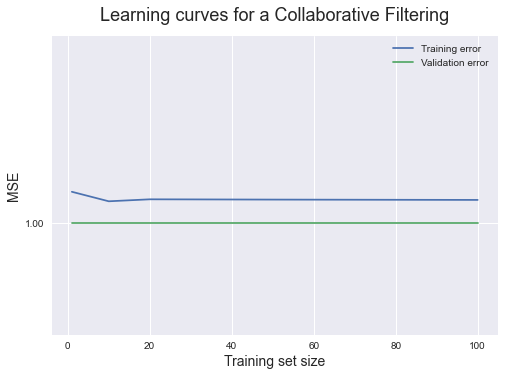

In [71]:
plt.style.use('seaborn')
plt.plot(train_size_hist, train_score_hist, label = 'Training error')
plt.plot(train_size_hist, test_score_hist, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.yticks(np.arange(0,2, 0.25))
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Collaborative Filtering', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.97,1.05)

In [72]:
#cleaning and transforming moviesDataset to use it on web-application 
moviesdataset=data.drop(['userid','rating'],axis=1)
moviesdataset=moviesdataset.drop_duplicates()

moviesdataset=moviesdataset.sort_values("movie_id")
moviesdataset=moviesdataset.reset_index(drop=True)

moviesdataset["movie_title"] = moviesdataset["movie_title"].str.lower() 
moviesdataset["movie_title"] = moviesdataset["movie_title"].str.replace(r"\(.*\)","")
moviesdataset.head()

C:\Users\yashg\AppData\Local\Temp\ipykernel_22436\3831420912.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  moviesdataset["movie_title"] = moviesdataset["movie_title"].str.replace(r"\(.*\)","")


,movie_id,movie_title
0,1,gadhvi
1,3,yaaram
2,5,aur pyaar ho gaya
3,6,yahaan
4,8,a question mark


In [74]:
# Initialize my ratings
my_ratings = np.zeros((9724,1))

# test rating by web-applicaiton user
my_ratings[5001] = 4 
my_ratings[4001] = 4
my_ratings[3001] = 4
my_ratings[5501] = 2
my_ratings[4501] = 1



print("New user ratings:\n")
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print("Rated",int(my_ratings[i]),"for Movie")
        print((moviesdataset.iloc[i]).movie_title)

New user ratings:

Rated 4 for Movie
kyon ki...
Rated 4 for Movie
photograph
Rated 1 for Movie
sampoorna mahabharat
Rated 4 for Movie
tarzan's daughter
Rated 2 for Movie
with luv... tumhaara


In [75]:
# top-N-movies
prediction(X,my_ratings,moviesdataset)

,movie_id,movie_title,Pridiction
3001,7961,kyon ki...,4.000000
5001,13825,tarzan's daughter,4.000000
4001,10839,photograph,4.000000
3343,8954,masti,3.140809
1603,4281,dus numbri,3.096112
2767,7397,kasoor,2.753307
5254,14423,tottaa pataaka item maal,2.718745
881,2292,bhoothnath returns,2.506025
376,879,always kabhi kabhi,2.501028
4339,11887,revolver rani,2.499519


In [76]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(X, 'Movies_Learned_Features.pkl')
joblib.dump(moviesdataset, 'Movies_Datase.pkl')
  

['Movies_Datase.pkl']